In [1]:
from lorenz96 import *
from calvin_stats.plots import kde_plot, init_2d_fax, autocorrelation_plot

In [2]:
# Run an integration

l96 = L96Integrator()
trajectory_observer = L96TrajectoryObserver(l96)
trajectory_observer.make_observations(100000, 0.01, transient=100)

100%|██████████| 100000/100000 [01:10<00:00, 1423.88it/s]


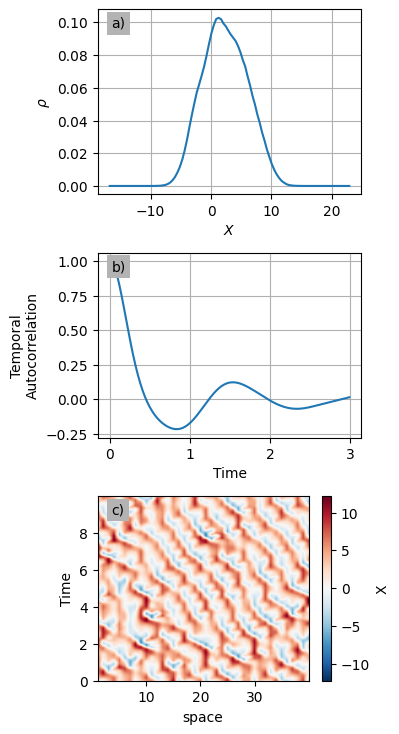

In [3]:
# Plot Figure

fig, axes = init_2d_fax(nrows=3)
trajectory_observer.observations.X.interp(space=np.arange(1, 40, 0.01), time=np.arange(0, 10, 0.01)).plot(ax=axes[2], add_colorbar=True)
axes[2].set_ylabel('Time')
kde_plot(trajectory_observer.observations.X, grid_points=100, fax = [fig, axes[0]])
axes[0].set_title('')
axes[0].grid()
axes[0].set_xlabel('$X$')
obs = trajectory_observer.observations.X.sel(space=1).values.flatten()
autocorrelation_plot(obs, lags=np.arange(0, 300), dt=0.01, fax=[fig, axes[1]])
axes[1].grid()
axes[1].set_title('')
axes[1].set_ylabel('Temporal\nAutocorrelation')
axes[1].set_xlabel('Time')
fig.tight_layout()
fig.savefig('/Users/cfn18/Documents/PhD-Work/Thesis/img/L96-EBM/L96-Summary.png', dpi=1200)